In [2]:
from scripts import utils
from scripts import gridsearch_svm
from tqdm import tqdm

In [32]:
columns = ['Descriptor', 'Spatial pyramid level', 'Codebook size', 'Step size', 'KP Scale',
        'PCA perc', 'Accuracy']

csv_filename = 'optimize_dense_sift.csv'

feat_des = 'sift'
dense = True

spatial_pyramid_level = [0]
step_size = [20, 30]

codebook_size = [1000]
n_components = 1
num_sizes = [1, 2, 3, 6, 10]

results = []


for pyramid_level in spatial_pyramid_level:
    print('Spatial pyramid level: ', pyramid_level)
    for step in step_size:
        print('Step size: ', step)
        for num_size in num_sizes:
            print('Number of size: ', num_size)
            params_pre = gridsearch_svm.set_params(feat_des=feat_des, dense=dense,
                                level=pyramid_level, step_div=step, num_sizes=num_size)

            train_des, D, test_des = gridsearch_svm.get_descriptors_D(params_pre)

            for k in codebook_size:
                print('Codebook size: ', k)
                params = gridsearch_svm.set_params(feat_des=feat_des,dense=dense,level=pyramid_level,
                                    k=k,step_div=step,lda_ncomponents=n_components)
                scores = gridsearch_svm.run(train_des, D, test_des, params)

                to_write = ['DENSE SIFT', pyramid_level, k, step, num_size, n_components, scores]
                results.append(to_write)
                print('#### Accuracy: ', scores)



Spatial pyramid level:  0
Step size:  20
Number of size:  1
Codebook size:  1000
#### Accuracy:  0.8373354670032456
Number of size:  2
Codebook size:  1000
#### Accuracy:  0.8410656328885684
Number of size:  3
Codebook size:  1000
#### Accuracy:  0.841586278398846
Number of size:  6
Codebook size:  1000
#### Accuracy:  0.8484944103858637
Number of size:  10
Codebook size:  1000
#### Accuracy:  0.8421272087991345
Step size:  30
Number of size:  1
Codebook size:  1000
#### Accuracy:  0.817668139199423
Number of size:  2
Codebook size:  1000
#### Accuracy:  0.8325437252073566
Number of size:  3
Codebook size:  1000
#### Accuracy:  0.8394676343310493
Number of size:  6
Codebook size:  1000
#### Accuracy:  0.8410521096285611
Number of size:  10
Codebook size:  1000
#### Accuracy:  0.8421204471691309


In [33]:
num_sizes

[1, 2, 3, 6, 10]

In [36]:
columns = ['Descriptor', 'Spatial pyramid level', 'Codebook size', 'Step size', 'KP Scale',
        'PCA perc', 'Accuracy']
columns

['Descriptor',
 'Spatial pyramid level',
 'Codebook size',
 'Step size',
 'KP Scale',
 'PCA perc',
 'Accuracy']

In [34]:
results

[['DENSE SIFT', 0, 1000, 20, 1, 1, 0.8373354670032456],
 ['DENSE SIFT', 0, 1000, 20, 2, 1, 0.8410656328885684],
 ['DENSE SIFT', 0, 1000, 20, 3, 1, 0.841586278398846],
 ['DENSE SIFT', 0, 1000, 20, 6, 1, 0.8484944103858637],
 ['DENSE SIFT', 0, 1000, 20, 10, 1, 0.8421272087991345],
 ['DENSE SIFT', 0, 1000, 30, 1, 1, 0.817668139199423],
 ['DENSE SIFT', 0, 1000, 30, 2, 1, 0.8325437252073566],
 ['DENSE SIFT', 0, 1000, 30, 3, 1, 0.8394676343310493],
 ['DENSE SIFT', 0, 1000, 30, 6, 1, 0.8410521096285611],
 ['DENSE SIFT', 0, 1000, 30, 10, 1, 0.8421204471691309]]

In [37]:
import pandas as pd
df = pd.DataFrame(results, columns=columns)

In [39]:
df_2 = pd.read_csv('results/hyper_params_dense_sift.csv')
df_2

,Descriptor,Spatial pyramid level,Codebook size,Step size,KP Scale,PCA perc,Accuracy
0,DENSE SIFT,0,1000,5,1,1,0.778320
1,DENSE SIFT,0,1000,5,2,1,0.783107
2,DENSE SIFT,0,1000,5,3,1,0.783637
3,DENSE SIFT,0,1000,5,6,1,0.775131
4,DENSE SIFT,0,1000,5,10,1,0.770880
5,DENSE SIFT,0,1000,8,1,1,0.796921
6,DENSE SIFT,0,1000,8,2,1,0.801190
7,DENSE SIFT,0,1000,8,3,1,0.800119
8,DENSE SIFT,0,1000,8,6,1,0.795325
9,DENSE SIFT,0,1000,8,10,1,0.797458


In [38]:
df

,Descriptor,Spatial pyramid level,Codebook size,Step size,KP Scale,PCA perc,Accuracy
0,DENSE SIFT,0,1000,20,1,1,0.837335
1,DENSE SIFT,0,1000,20,2,1,0.841066
2,DENSE SIFT,0,1000,20,3,1,0.841586
3,DENSE SIFT,0,1000,20,6,1,0.848494
4,DENSE SIFT,0,1000,20,10,1,0.842127
5,DENSE SIFT,0,1000,30,1,1,0.817668
6,DENSE SIFT,0,1000,30,2,1,0.832544
7,DENSE SIFT,0,1000,30,3,1,0.839468
8,DENSE SIFT,0,1000,30,6,1,0.841052
9,DENSE SIFT,0,1000,30,10,1,0.842120


In [40]:
df_all = pd.concat([df_2, df], ignore_index=True)
df_all

,Descriptor,Spatial pyramid level,Codebook size,Step size,KP Scale,PCA perc,Accuracy
0,DENSE SIFT,0,1000,5,1,1,0.778320
1,DENSE SIFT,0,1000,5,2,1,0.783107
2,DENSE SIFT,0,1000,5,3,1,0.783637
3,DENSE SIFT,0,1000,5,6,1,0.775131
4,DENSE SIFT,0,1000,5,10,1,0.770880
5,DENSE SIFT,0,1000,8,1,1,0.796921
6,DENSE SIFT,0,1000,8,2,1,0.801190
7,DENSE SIFT,0,1000,8,3,1,0.800119
8,DENSE SIFT,0,1000,8,6,1,0.795325
9,DENSE SIFT,0,1000,8,10,1,0.797458


In [42]:
df_all.to_csv('results/hyper_params_dense_sift.csv', index=False)

In [16]:
df.to_csv('results/hyper_params_dense_sift.csv', index=False)

<AxesSubplot: title={'center': 'Cross-validation accuracy, num_sizes=1'}, xlabel='Step size'>

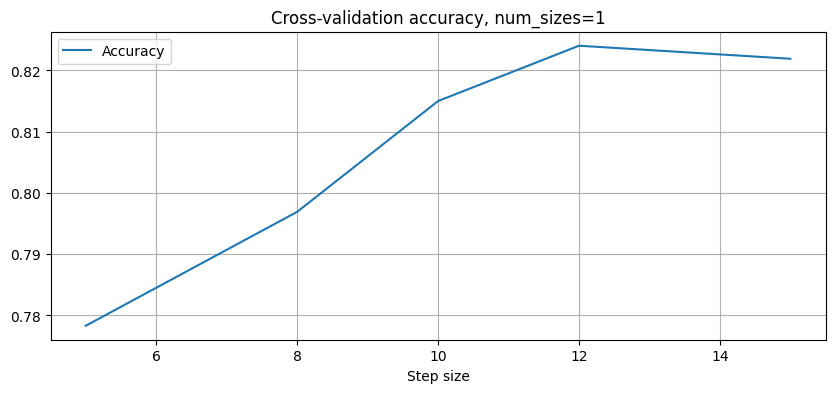

In [31]:
import matplotlib.pyplot as plt
df_dense_sift = df.copy()[df['KP Scale'] == 1]
df_dense_sift.plot.line(
    x='Step size',
    y='Accuracy',
    title='Cross-validation accuracy, num_sizes=1',
    figsize=(10,4),
    grid=True)  

